In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

/var/folders/r9/905wglgd76v1f_n1q9jw68rr0000gn/T/ipykernel_7686/4007439564.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-25-2022.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-25-2022.csv')

In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-07-26 04:20:58,33.93911,67.709953,184819,7738,NaN,NaN,Afghanistan,474.767214,4.186799
1,NaN,NaN,NaN,Albania,2022-07-21 23:21:03,41.15330,20.168300,305123,3529,NaN,NaN,Albania,10213.253180,1.196596
2,NaN,NaN,NaN,Algeria,2022-07-26 04:20:58,28.03390,1.659600,266916,6876,NaN,NaN,Algeria,608.687916,2.576091
3,NaN,NaN,NaN,Andorra,2022-07-26 04:20:58,42.50630,1.521800,45326,153,NaN,NaN,Andorra,58663.042775,0.337555
4,NaN,NaN,NaN,Angola,2022-07-26 04:20:58,-11.20270,17.873900,102301,1912,NaN,NaN,Angola,311.264425,1.868994


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7731,7733,7736,7737,7738,7738,7738,7738,7738,7742
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3517,3518,3520,3521,3521,3523,3525,3527,3529,3532
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6876,6876,6876
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1909,1912,1912,1912,1912,1912,1912,1912,1912,1912


In [7]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2022-07-26 04:32:01,32.3182,-86.9023,1413426,19888,NaN,NaN,1.0,28826.691222,7957429.0,NaN,1.407078,84000001.0,USA,162291.021040,NaN
1,Alaska,US,2022-07-26 04:32:01,61.3707,-152.4044,281203,1309,NaN,NaN,2.0,38439.603852,NaN,NaN,0.465500,84000002.0,USA,NaN,NaN
2,American Samoa,US,2022-07-26 04:32:01,-14.2710,-170.1320,7471,33,NaN,NaN,60.0,13427.149045,NaN,NaN,0.441708,16.0,ASM,NaN,NaN
3,Arizona,US,2022-07-26 04:32:01,33.7298,-111.4312,2179180,30698,NaN,NaN,4.0,29939.067558,20213642.0,NaN,1.408695,84000004.0,USA,277708.859954,NaN
4,Arkansas,US,2022-07-26 04:32:01,34.9697,-92.3731,896275,11673,NaN,NaN,5.0,29699.576248,5344269.0,NaN,1.302390,84000005.0,USA,177091.322034,NaN


In [9]:
# columns
confirmed_df.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/17/22', '7/18/22', '7/19/22', '7/20/22', '7/21/22', '7/22/22',
       '7/23/22', '7/24/22', '7/25/22', '7/26/22'],
      dtype='object', length=921)

In [8]:
cols = confirmed_df.keys()

In [10]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [11]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)

In [12]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [13]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [14]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [15]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [16]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 790
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False) 

In [17]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [18]:
# svm_search.best_params_

In [19]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 4918268.288184448
MSE: 25944724721259.34


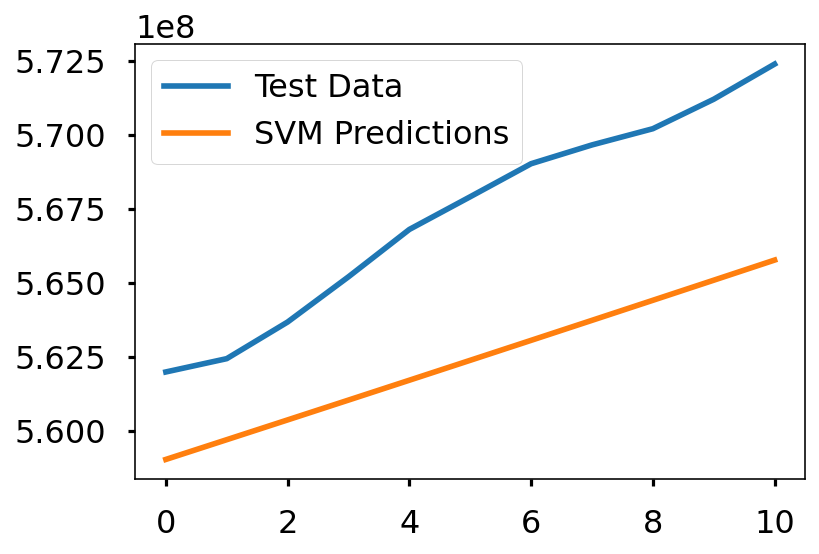

In [20]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))